<a href="https://colab.research.google.com/github/Smar-na/FemTech-/blob/main/descriptive_stats_for_apps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ratings propotion to the replies
1-3 and 3-5 or below and above average

In [ ]:
import pandas as pd
df = pd.read_csv("/content/app_reviews_with_time_and_version_clue.csv")
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,124c1e6e-79fd-4b78-abdf-7a37a8b42a74,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,The unskippable ads for Clue Plus every time y...,1.0,0.0,NaN,2024-10-15 16:20:56,"Hello, we understand you’re disappointed about...",2024-10-16 06:50:43,NaN
1,5ce244cb-9725-46d9-a183-d5955714ce8d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,very nicr app,5.0,0.0,NaN,2024-10-15 14:56:04,Thanks for sharing your review here. It means ...,2024-10-16 06:18:11,NaN
2,db54624d-cee4-4a92-87ed-5ff2e0107547,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,not good,1.0,0.0,NaN,2024-10-15 14:51:43,"Hey, thanks for your review. We’re sorry to he...",2024-10-16 06:51:04,NaN
3,ff64c2f2-e8fc-4c56-bc1d-94fc37f2366f,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Splendid found it helpful hope it'll help me h...,5.0,0.0,176.0,2024-10-15 12:11:25,Thanks for the positive review! Your feedback ...,2024-10-15 13:02:39,176.0
4,0b9bf3e2-785e-4485-bb3c-d43ff0685838,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Clue just keeps getting better and better. Mor...,5.0,0.0,163.0,2024-10-15 11:17:12,Thanks for the positive review! Your feedback ...,2024-10-15 13:02:40,163.0


In [ ]:
df.describe()

,score,thumbsUpCount
count,33916.000000,33916.000000
mean,4.180918,1.651934
std,1.410141,9.254917
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,356.000000


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime

# 1. Data Cleaning
# Drop duplicates
df.drop_duplicates(subset=['reviewId'], inplace=True)

# Check for missing values
print(df.isnull().sum())

reviewId                    0
userName                    0
userImage                   1
content                     1
score                       1
thumbsUpCount               1
reviewCreatedVersion     3716
at                          1
replyContent            25497
repliedAt               25497
appVersion               3716
dtype: int64


In [ ]:
# Fill or drop missing values as needed
# Drop rows with missing 'content' as they are not helpful for review analysis
df.dropna(subset=['content'], inplace=True)

# Convert 'at' and 'repliedAt' to datetime
df['at'] = pd.to_datetime(df['at'], errors='coerce')
df['repliedAt'] = pd.to_datetime(df['repliedAt'], errors='coerce')

# Remove unnecessary columns
df.drop(['userImage'], axis=1, inplace=True)

# Standardize text data in 'content'
df['content'] = df['content'].str.lower().str.strip()

In [ ]:
# 2. Exploratory Data Analysis
# Basic statistics
df.describe()


,score,thumbsUpCount,at,repliedAt
count,33916.000000,33916.000000,33916,8420
mean,4.180918,1.651934,2021-01-13 16:50:15.598714368,2022-07-22 16:53:04.202137600
min,1.000000,0.000000,2019-04-03 14:42:43,2014-10-27 19:15:53
25%,4.000000,0.000000,2019-10-06 15:25:53.750000128,2021-03-18 14:09:51.750000128
50%,5.000000,0.000000,2020-07-21 23:20:23.500000,2023-02-15 11:07:37
75%,5.000000,0.000000,2022-01-07 10:56:42,2023-07-18 13:41:01.249999872
max,5.000000,356.000000,2024-10-15 16:20:56,2024-10-16 06:51:04
std,1.410141,9.254917,NaN,NaN


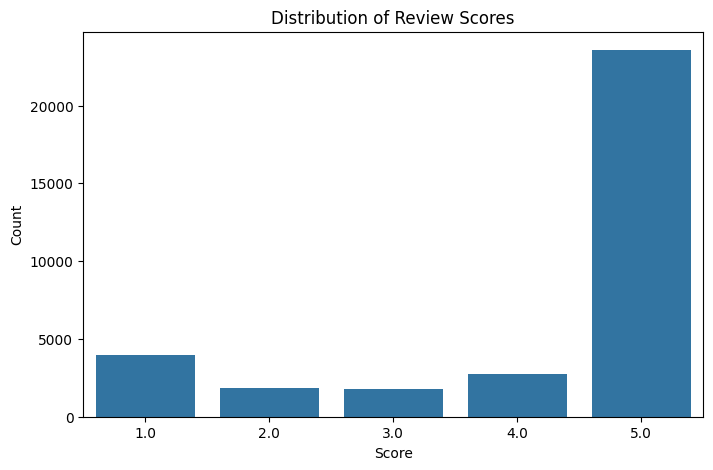

In [ ]:

# Score distribution visualization
plt.figure(figsize=(8, 5))
sns.countplot(x='score', data=df)
plt.title('Distribution of Review Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

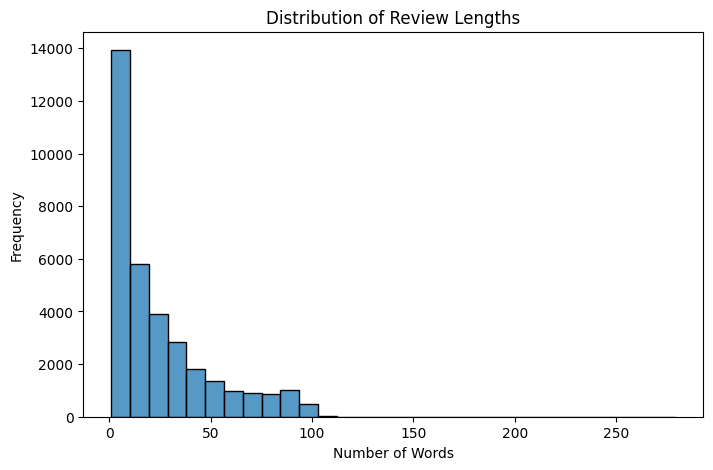

In [ ]:
# Review length analysis
df['review_length'] = df['content'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 5))
sns.histplot(df['review_length'], bins=30)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


In [ ]:
df["appVersion"]

,appVersion
0,NaN
1,NaN
2,NaN
3,176.0
4,163.0
...,...
33911,5.9.0
33912,5.9.0
33913,5.9.0
33914,5.9.0


In [ ]:
# Extract the year from the 'at' datetime column
df['year'] = pd.to_datetime(df['at'], errors='coerce').dt.year

# Display the number of missing values in 'appVersion'
print("Missing values in 'appVersion' before filling:", df['appVersion'].isnull().sum())

# Find the most common appVersion for each year
common_versions = df.groupby('year')['appVersion'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

# Create a dictionary for year-to-appVersion mapping
version_mapping = common_versions.to_dict()

# Fill missing 'appVersion' values based on the year
df['appVersion_filled'] = df.apply(lambda row: row['appVersion'] if pd.notnull(row['appVersion']) else version_mapping.get(row['year']), axis=1)

# Display the number of missing values in 'appVersion' after filling
print("Missing values in 'appVersion' after filling:", df['appVersion_filled'].isnull().sum())

Missing values in 'appVersion' before filling: 3715
Missing values in 'appVersion' after filling: 0


In [ ]:
# Create a table of corresponding versions to year before and after filling
versions_table = df.groupby('year').agg(
    original_versions=('appVersion', lambda x: x.mode().values[0] if not x.mode().empty else 'No data'),
    filled_versions=('appVersion_filled', lambda x: x.mode().values[0] if not x.mode().empty else 'No data'),
    average_score=('score', 'mean')
).reset_index()

# Display the versions table
print(versions_table)

   year original_versions filled_versions  average_score
0  2019            5.21.1          5.21.1       4.799422
1  2020              10.0            10.0       4.532362
2  2021              37.0            37.0       3.899921
3  2022              72.0            72.0       4.369798
4  2023             101.2           101.2       2.533011
5  2024             136.1           136.1       2.933121


In [ ]:
# Create a table of corresponding versions to year before and after filling
versions_table = df.groupby('year').agg(
    original_versions=('appVersion', lambda x: x.mode().values[0] if not x.mode().empty else 'No data'),
    filled_versions=('appVersion_filled', lambda x: x.mode().values[0] if not x.mode().empty else 'No data'),
    average_score=('score', 'mean')
).reset_index()

# Display the versions table
print(versions_table)


   year original_versions filled_versions  average_score
0  2019            5.21.1          5.21.1       4.799422
1  2020              10.0            10.0       4.532362
2  2021              37.0            37.0       3.899921
3  2022              72.0            72.0       4.369798
4  2023             101.2           101.2       2.533011
5  2024             136.1           136.1       2.933121


In [ ]:
# Count the number of distinct app versions for each year
version_count_table = df.groupby('year')['appVersion'].nunique().reset_index()

# Rename columns for clarity
version_count_table.columns = ['year', 'total_versions']

# Display the version count table
print(version_count_table)

   year  total_versions
0  2019              60
1  2020              82
2  2021              82
3  2022              65
4  2023             108
5  2024              83


In [ ]:
# Calculate the total number of reviews and the average score for each appVersion
version_summary = df.groupby('appVersion').agg(
    total_reviews=('reviewId', 'count'),  # Counting the number of reviews for each version
    average_score=('score', 'mean')  # Calculating the average score for each version
).reset_index()

# Display the version summary table
print(version_summary)

    appVersion  total_reviews  average_score
0        1.4.5              1       5.000000
1        1.9.4              1       2.000000
2         10.0            937       4.748132
3        100.0              2       3.500000
4        101.0             23       2.086957
..         ...            ...            ...
229       71.0            276       4.456522
230       72.0            295       4.579661
231       73.0            419       4.372315
232        8.0            398       4.786432
233        9.0            207       4.719807

[234 rows x 3 columns]


<ipython-input-17-068192580b5f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='total_versions', data=version_count_table, palette='viridis')


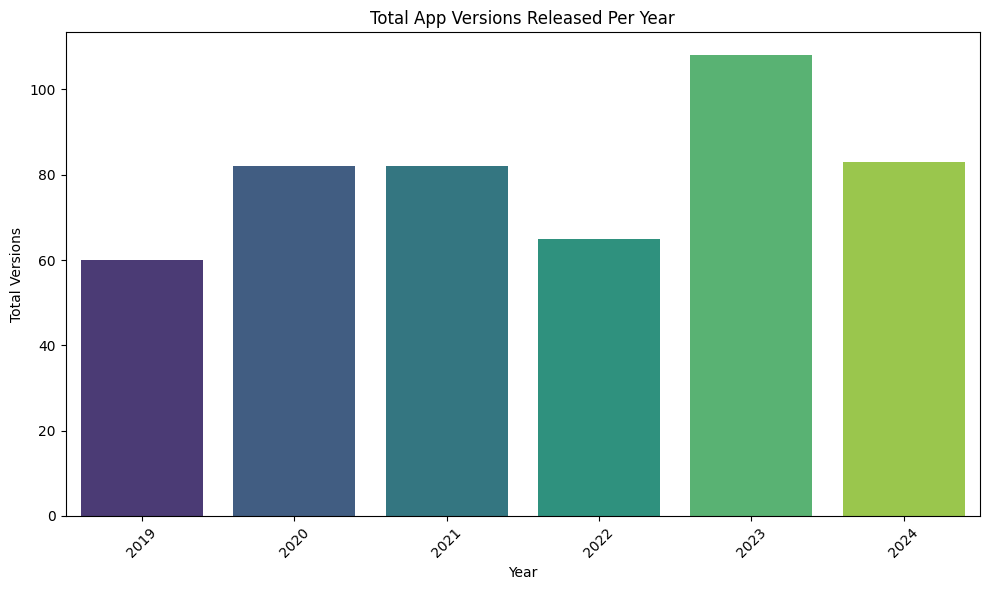

In [ ]:
# 1. Year-wise Analysis
# Bar plot of total versions per year
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='total_versions', data=version_count_table, palette='viridis')
plt.title('Total App Versions Released Per Year')
plt.xlabel('Year')
plt.ylabel('Total Versions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

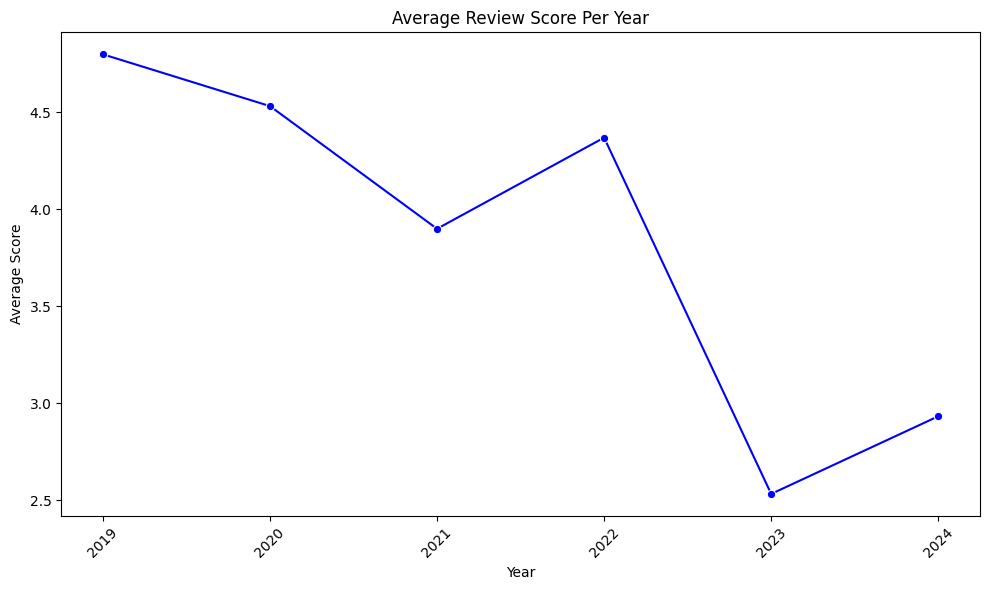

In [ ]:
# Line plot of average score per year
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='average_score', data=versions_table, marker='o', color='blue')
plt.title('Average Review Score Per Year')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-19-49ab27cb67a1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='appVersion', y='total_reviews', data=version_summary, palette='coolwarm')


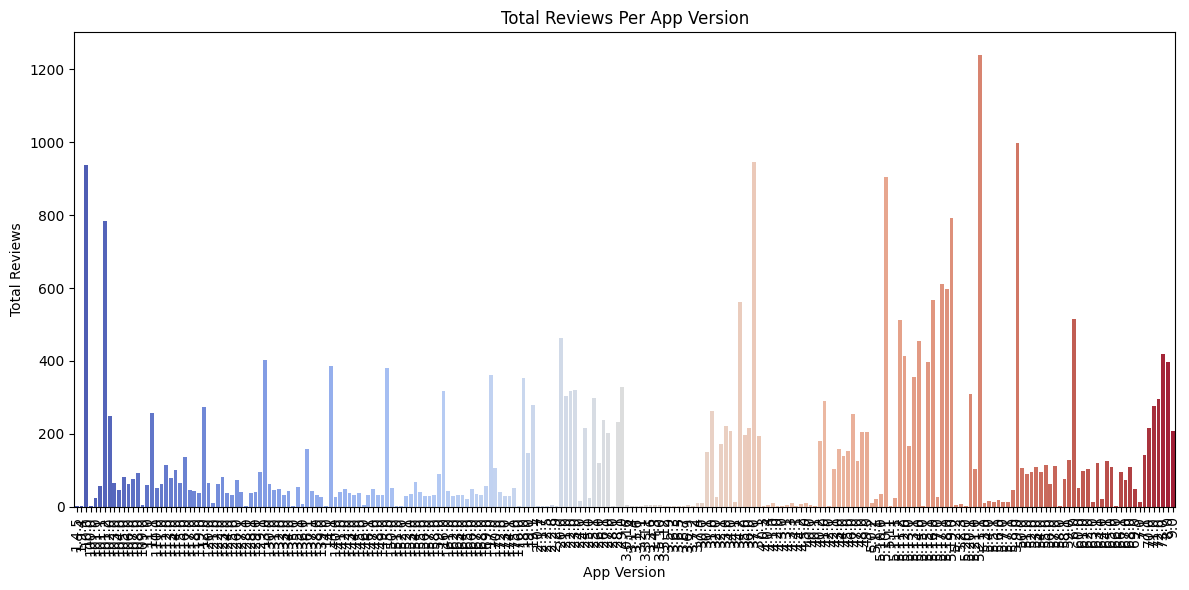

In [ ]:
# 2. Version-wise Analysis
# Bar plot of total reviews per app version
plt.figure(figsize=(12, 6))
sns.barplot(x='appVersion', y='total_reviews', data=version_summary, palette='coolwarm')
plt.title('Total Reviews Per App Version')
plt.xlabel('App Version')
plt.ylabel('Total Reviews')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

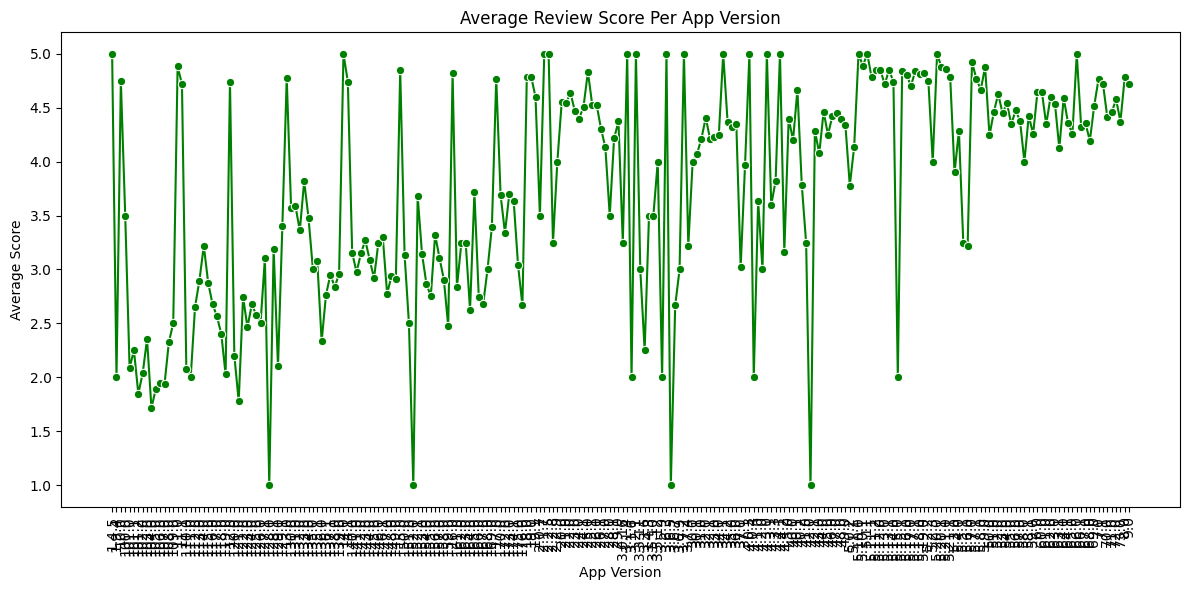

In [ ]:

# Line plot of average score per app version
plt.figure(figsize=(12, 6))
sns.lineplot(x='appVersion', y='average_score', data=version_summary, marker='o', color='green')
plt.title('Average Review Score Per App Version')
plt.xlabel('App Version')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

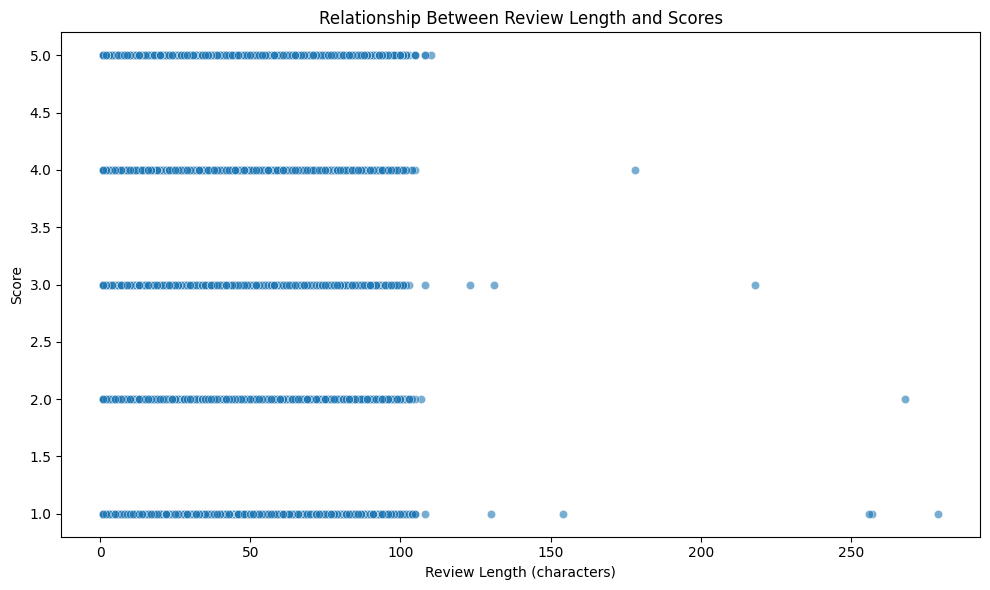

In [ ]:
# 1. Scatter Plot of Review Length vs. Scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_length', y='score', data=df, alpha=0.6)
plt.title('Relationship Between Review Length and Scores')
plt.xlabel('Review Length (characters)')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


Pearson Correlation between review length and scores: -0.4195


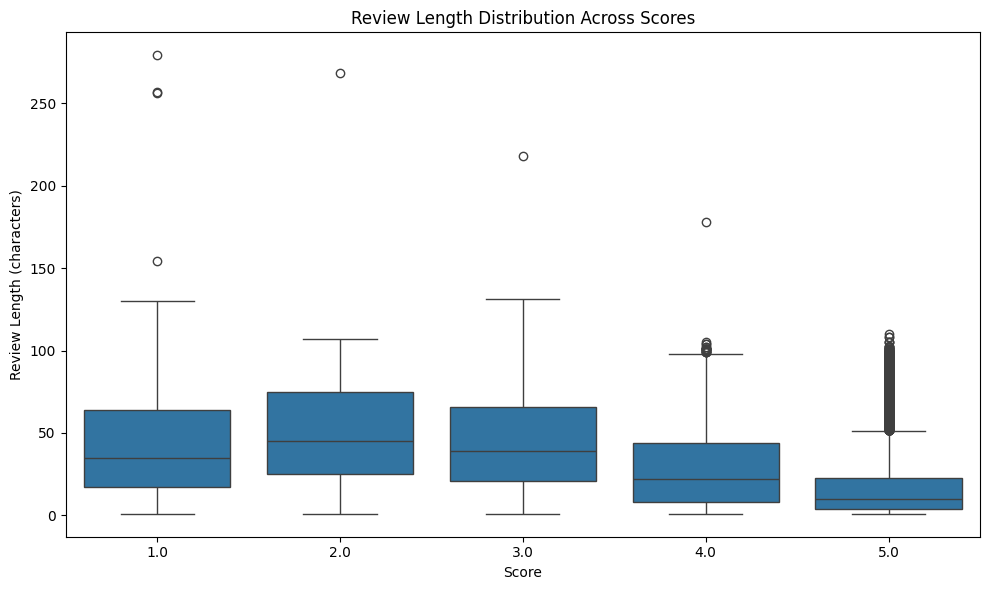

In [ ]:
# 2. Calculate the Pearson Correlation Coefficient
correlation = df['review_length'].corr(df['score'])
print(f"Pearson Correlation between review length and scores: {correlation:.4f}")

# 3. Boxplot to Show Review Length Distribution Across Scores
plt.figure(figsize=(10, 6))
sns.boxplot(x='score', y='review_length', data=df)
plt.title('Review Length Distribution Across Scores')
plt.xlabel('Score')
plt.ylabel('Review Length (characters)')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the count of each score
score_counts = df['score'].value_counts()

# Calculate the total number of scores
total_scores = score_counts.sum()

# Calculate the proportion of each score as a percentage
score_proportions = (score_counts / total_scores) * 100

# Create a DataFrame for better visualization
proportion_df = score_proportions.reset_index()
proportion_df.columns = ['score', 'proportion (%)']

# Display the DataFrame
print(proportion_df)

   score  proportion (%)
0    5.0       69.483430
1    1.0       11.702441
2    4.0        8.043401
3    2.0        5.513622
4    3.0        5.257106


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert 'at' to datetime format to extract the quarter
df['at'] = pd.to_datetime(df['at'], errors='coerce')

# Extract year and quarter
df['year_quarter'] = df['at'].dt.to_period('Q')  # This will give values like '2024Q4'

# Group by year_quarter and appVersion, and calculate number of reviews and average score
quarterly_summary = df.groupby(['year_quarter']).agg(
    review_count=('content', 'count'),  # Count the number of reviews
    average_score=('score', 'mean')     # Calculate the average score
).reset_index()

# Calculate the total number of reviews per quarter (sum of review counts for all versions)
review_count_per_quarter = quarterly_summary.groupby('year_quarter')['review_count'].sum().reset_index()
review_count_per_quarter.columns = ['year_quarter', 'total_reviews']

# Merge the total review count back to the summary table for reference
quarterly_summary = pd.merge(quarterly_summary, review_count_per_quarter, on='year_quarter')

# Display the quarterly summary
print(quarterly_summary)


   year_quarter  review_count  average_score  total_reviews
0        2019Q2          4395       4.836860           4395
1        2019Q3          3916       4.796987           3916
2        2019Q4          2757       4.743199           2757
3        2020Q1          2540       4.750394           2540
4        2020Q2          2803       4.646450           2803
5        2020Q3          2148       4.376629           2148
6        2020Q4          1779       4.229342           1779
7        2021Q1          2168       3.547048           2168
8        2021Q2          1321       3.891749           1321
9        2021Q3           853       4.343494            853
10       2021Q4           694       4.472622            694
11       2022Q1           692       4.401734            692
12       2022Q2           718       4.240947            718
13       2022Q3           590       4.310169            590
14       2022Q4           523       4.571702            523
15       2023Q1          1560       2.57

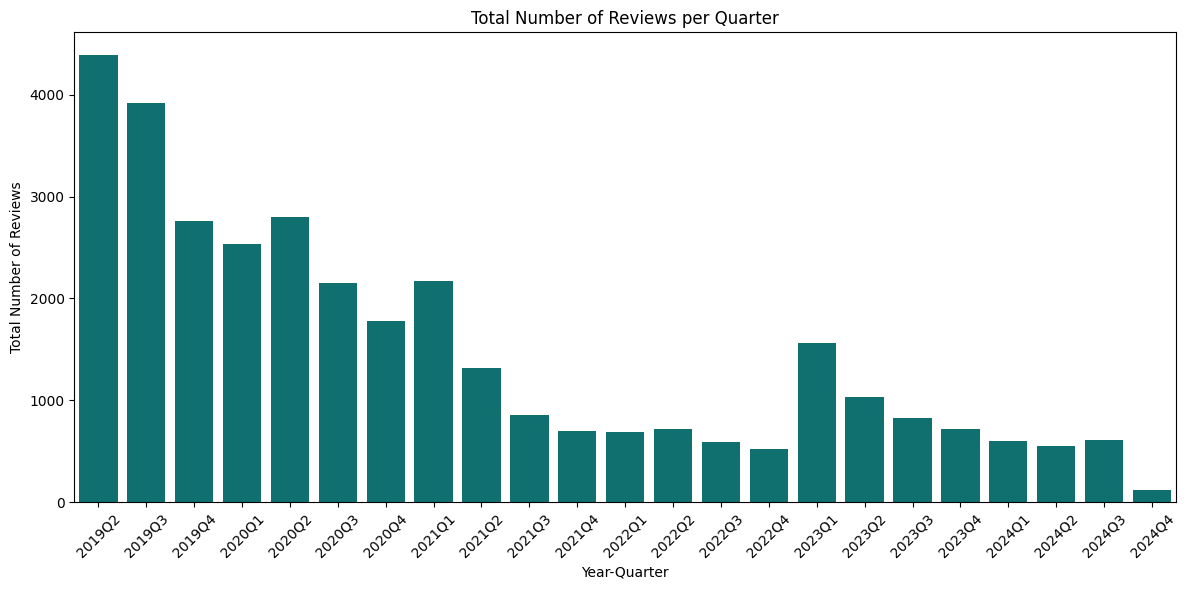

In [ ]:
# 1. Plot the total number of reviews per quarter
plt.figure(figsize=(12, 6))
sns.barplot(data=review_count_per_quarter, x='year_quarter', y='total_reviews', color='teal')
plt.title('Total Number of Reviews per Quarter')
plt.xlabel('Year-Quarter')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the number of unique app versions per quarter
version_count_per_quarter = df.groupby('year_quarter')['appVersion'].nunique().reset_index()
version_count_per_quarter.columns = ['year_quarter', 'version_count']

# Calculate the average score per quarter
average_score_per_quarter = df.groupby('year_quarter')['score'].mean().reset_index()
average_score_per_quarter.columns = ['year_quarter', 'average_score']

# Merge the version count and average score data
version_score_summary = pd.merge(version_count_per_quarter, average_score_per_quarter, on='year_quarter')

# Display the version and score summary
print(version_score_summary)

   year_quarter  version_count  average_score
0        2019Q2             35       4.836860
1        2019Q3             39       4.796987
2        2019Q4             41       4.743199
3        2020Q1             36       4.750394
4        2020Q2             47       4.646450
5        2020Q3             52       4.376629
6        2020Q4             53       4.229342
7        2021Q1             49       3.547048
8        2021Q2             37       3.891749
9        2021Q3             28       4.343494
10       2021Q4             32       4.472622
11       2022Q1             35       4.401734
12       2022Q2             37       4.240947
13       2022Q3             26       4.310169
14       2022Q4             21       4.571702
15       2023Q1             46       2.573718
16       2023Q2             34       2.131274
17       2023Q3             49       2.574727
18       2023Q4             43       2.977654
19       2024Q1             40       2.859038
20       2024Q2             34    

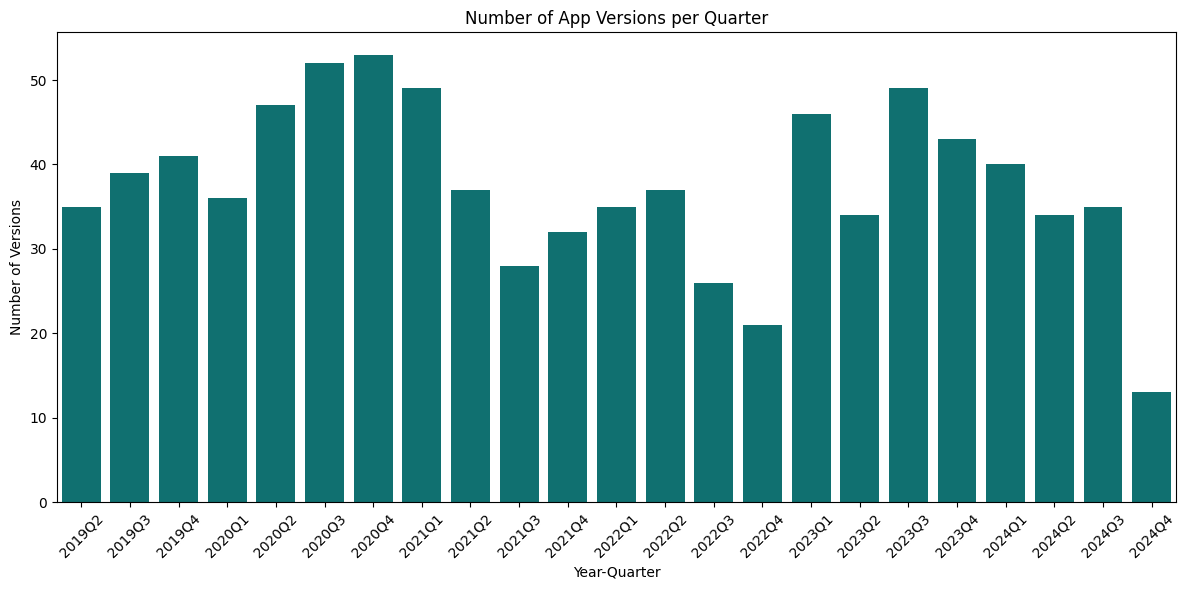

In [ ]:
# 1. Plot the number of app versions per quarter
plt.figure(figsize=(12, 6))
sns.barplot(data=version_count_per_quarter, x='year_quarter', y='version_count', color='teal')
plt.title('Number of App Versions per Quarter')
plt.xlabel('Year-Quarter')
plt.ylabel('Number of Versions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 2. Plot the average score per quarter
# Calculate the average score per quarter
average_score_per_quarter = df.groupby('year_quarter')['score'].mean().reset_index()
average_score_per_quarter.columns = ['year_quarter', 'average_score']
print(average_score_per_quarter)

   year_quarter  average_score
0        2019Q2       4.836860
1        2019Q3       4.796987
2        2019Q4       4.743199
3        2020Q1       4.750394
4        2020Q2       4.646450
5        2020Q3       4.376629
6        2020Q4       4.229342
7        2021Q1       3.547048
8        2021Q2       3.891749
9        2021Q3       4.343494
10       2021Q4       4.472622
11       2022Q1       4.401734
12       2022Q2       4.240947
13       2022Q3       4.310169
14       2022Q4       4.571702
15       2023Q1       2.573718
16       2023Q2       2.131274
17       2023Q3       2.574727
18       2023Q4       2.977654
19       2024Q1       2.859038
20       2024Q2       2.832117
21       2024Q3       3.058920
22       2024Q4       3.122951


In [ ]:
 #Merge the data into a single DataFrame for correlation analysis
correlation_data = pd.merge(version_count_per_quarter, average_score_per_quarter, on='year_quarter')
correlation_data = pd.merge(correlation_data, review_count_per_quarter, on='year_quarter')

# Display the merged data
print(correlation_data)


   year_quarter  version_count  average_score  total_reviews
0        2019Q2             35       4.836860           4395
1        2019Q3             39       4.796987           3916
2        2019Q4             41       4.743199           2757
3        2020Q1             36       4.750394           2540
4        2020Q2             47       4.646450           2803
5        2020Q3             52       4.376629           2148
6        2020Q4             53       4.229342           1779
7        2021Q1             49       3.547048           2168
8        2021Q2             37       3.891749           1321
9        2021Q3             28       4.343494            853
10       2021Q4             32       4.472622            694
11       2022Q1             35       4.401734            692
12       2022Q2             37       4.240947            718
13       2022Q3             26       4.310169            590
14       2022Q4             21       4.571702            523
15       2023Q1         

   year_quarter  version_count  average_score  review_count
0        2019Q2             35       4.836860          4395
1        2019Q3             39       4.796987          3916
2        2019Q4             41       4.743199          2757
3        2020Q1             36       4.750394          2540
4        2020Q2             47       4.646450          2803
5        2020Q3             52       4.376629          2148
6        2020Q4             53       4.229342          1779
7        2021Q1             49       3.547048          2168
8        2021Q2             37       3.891749          1321
9        2021Q3             28       4.343494           853
10       2021Q4             32       4.472622           694
11       2022Q1             35       4.401734           692
12       2022Q2             37       4.240947           718
13       2022Q3             26       4.310169           590
14       2022Q4             21       4.571702           523
15       2023Q1             46       2.5

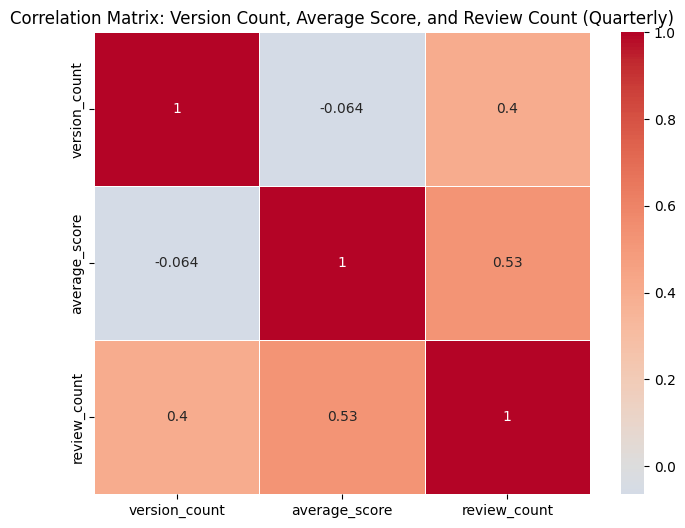

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'df' is already loaded and has the required columns

# Convert 'at' to datetime format to extract the quarter
df['at'] = pd.to_datetime(df['at'], errors='coerce')

# Extract year and quarter
df['year_quarter'] = df['at'].dt.to_period('Q')  # This will give values like '2024Q4'

# Calculate the number of unique app versions per quarter
version_count_per_quarter = df.groupby('year_quarter')['appVersion'].nunique().reset_index()
version_count_per_quarter.columns = ['year_quarter', 'version_count']

# Calculate the average score per quarter
average_score_per_quarter = df.groupby('year_quarter')['score'].mean().reset_index()
average_score_per_quarter.columns = ['year_quarter', 'average_score']

# Calculate the total number of reviews per quarter
review_count_per_quarter = df.groupby('year_quarter')['content'].count().reset_index()
review_count_per_quarter.columns = ['year_quarter', 'review_count']

# Merge the data into a single DataFrame for correlation analysis
correlation_data = pd.merge(version_count_per_quarter, average_score_per_quarter, on='year_quarter')
correlation_data = pd.merge(correlation_data, review_count_per_quarter, on='year_quarter')

# Display the merged data
print(correlation_data)

# Calculate the correlation matrix
correlation_matrix = correlation_data[['version_count', 'average_score', 'review_count']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix: Version Count, Average Score, and Review Count (Quarterly)')
plt.show()



   year_month  version_count  average_score  review_count
0     2019-04             20       4.890727          1995
1     2019-05             19       4.818701          1401
2     2019-06             22       4.754755           999
3     2019-07             20       4.782414          1342
4     2019-08             31       4.815806          1569
..        ...            ...            ...           ...
62    2024-06             13       2.730061           163
63    2024-07             17       2.781421           183
64    2024-08             16       2.886598           194
65    2024-09             14       3.418803           234
66    2024-10             13       3.122951           122

[67 rows x 4 columns]
Correlation Matrix (Monthly):
               version_count  average_score  review_count
version_count       1.000000       0.050921      0.564126
average_score       0.050921       1.000000      0.418394
review_count        0.564126       0.418394      1.000000


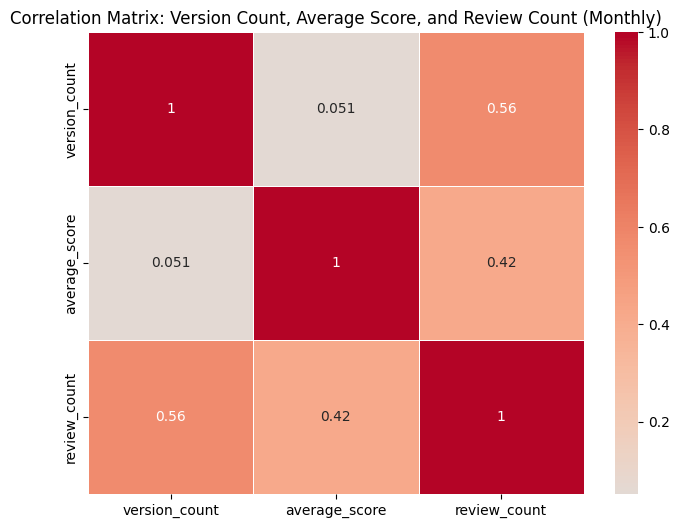

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'df' is already loaded and has the required columns

# Convert 'at' to datetime format to extract the month
df['at'] = pd.to_datetime(df['at'], errors='coerce')

# Extract year and month
df['year_month'] = df['at'].dt.to_period('M')  # This will give values like '2024-10'

# Calculate the number of unique app versions per month
version_count_per_month = df.groupby('year_month')['appVersion'].nunique().reset_index()
version_count_per_month.columns = ['year_month', 'version_count']

# Calculate the average score per month
average_score_per_month = df.groupby('year_month')['score'].mean().reset_index()
average_score_per_month.columns = ['year_month', 'average_score']

# Calculate the total number of reviews per month
review_count_per_month = df.groupby('year_month')['content'].count().reset_index()
review_count_per_month.columns = ['year_month', 'review_count']

# Merge the data into a single DataFrame for correlation analysis
correlation_data_monthly = pd.merge(version_count_per_month, average_score_per_month, on='year_month')
correlation_data_monthly = pd.merge(correlation_data_monthly, review_count_per_month, on='year_month')

# Display the merged data
print(correlation_data_monthly)

# Calculate the correlation matrix
correlation_matrix_monthly = correlation_data_monthly[['version_count', 'average_score', 'review_count']].corr()

# Display the correlation matrix
print("Correlation Matrix (Monthly):")
print(correlation_matrix_monthly)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_monthly, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix: Version Count, Average Score, and Review Count (Monthly)')
plt.show()


In [ ]:
pip install pandas scikit-learn nltk gensim pyLDAvis matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 22.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import nltk
import gensim
from gensim import corpora
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import string
import pyLDAvis.gensim

# Load NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define a text cleaning function
def clean_text(text):
    # Remove punctuation, convert to lowercase, and remove stopwords
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply cleaning function to reviews
df['cleaned_content'] = df['content'].apply(lambda x: clean_text(x) if isinstance(x, str) else '')

# Perform topic modeling for each review score
def perform_lda_for_score(score, num_topics=3, num_words=5):
    # Filter the reviews for the given score
    filtered_reviews = df[df['score'] == score]['cleaned_content'].tolist()

    # Create a document-term matrix
    vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
    X = vectorizer.fit_transform(filtered_reviews)

    # Create a dictionary and corpus for LDA
    dictionary = corpora.Dictionary([review.split() for review in filtered_reviews])
    corpus = [dictionary.doc2bow(review.split()) for review in filtered_reviews]

    # Fit the LDA model
    lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)

    # Display the top words for each topic
    print(f"\nTop topics for score {score}:")
    for i, topic in lda_model.show_topics(num_topics=num_topics, num_words=num_words, formatted=False):
        words = ', '.join([word[0] for word in topic])
        print(f"Topic {i + 1}: {words}")

    # Visualize the topics using pyLDAvis (optional)
    # pyLDAvis.enable_notebook()
    # lda_vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
    # pyLDAvis.show(lda_vis)

# Perform LDA for each score (1, 2, 3, 4, 5)
for score in range(1, 6):
    perform_lda_for_score(score)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



Top topics for score 1:
Topic 1: app, open, years, data, ive
Topic 2: app, update, used, new, use
Topic 3: app, period, window, dont, days


KeyboardInterrupt: 